# First explorations of helicopter fast data
#### Brian Mapes, Sept 13 2024
#### Goal: understand basic character of instruments and data 
### Especially vertical wind (key to all fluxes) 
### Use redundancy of two systems to find strengths 
#### or find weaknesses, in hopes to filter them out

In [1]:
# Packages and open datafile

import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# September 2024 big data deposit from John : 1100 has a couple dropouts so try 1130
df = pd.read_csv('/Users/bmapes/Downloads/TOA5_SUSTAIN_Windx2I.FAST_3_2023_07_01_1130.dat', low_memory=False, skiprows=1)
pd.options.display.max_columns = None  # unlimited column display
df.drop([0,1], inplace=True)  # First two rows are units string and something else 
df.index = pd.RangeIndex(0, df.shape[0])  # new index from 0 after discarding those two rows 

# Convert ASCII strings into floating point numbers 
for col in df.keys()[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)

df

,TIMESTAMP,RECORD,latitude_a,latitude_b,longitude_a,longitude_b,speed,course,magnetic_variation,fix_quality,nmbr_satellites,altitude,pps,dt_since_gprmc,gps_ready,max_clock_change,nmbr_clock_change,Ux1,Uy1,Uz1,Ts1,diag_sonic1,CO21,H2O1,diag_irga1,cell_tmpr1,cell_press1,CO2_sig_strgth1,H2O_sig_strgth1,Ux2,Uy2,Uz2,Ts2,diag_sonic2,CO22,H2O2,diag_irga2,cell_tmpr2,cell_press2,CO2_sig_strgth2,H2O_sig_strgth2
0,2023-07-01 11:30:00.05,120997.0,25.0,34.40,-80.0,-7.436,64.4,182.4,-6.3,2.0,10.0,299.1,7000.0,0.018,6.0,-7999.0,538.0,29.89718,2.009369,2.571635,31.37840,0.0,731.9681,13.16592,0.0,27.26419,98.16946,0.760256,0.742747,28.72565,0.334811,0.896549,28.84374,0.0,713.3652,20.35150,0.0,27.25977,98.23348,0.943798,0.926359
1,2023-07-01 11:30:00.1,120998.0,25.0,34.40,-80.0,-7.436,64.4,182.4,-6.3,2.0,10.0,299.1,7000.0,0.068,6.0,-7999.0,538.0,29.66976,1.877920,2.562538,31.33594,0.0,725.8137,13.09558,0.0,27.26419,98.16946,0.759423,0.741325,28.57763,0.242416,0.953827,28.64696,0.0,715.0685,20.28587,0.0,27.25977,98.23348,0.941832,0.922978
2,2023-07-01 11:30:00.15,120999.0,25.0,34.40,-80.0,-7.436,64.4,182.4,-6.3,2.0,10.0,299.1,7000.0,0.118,6.0,-7999.0,538.0,29.69712,1.832665,2.492235,31.47576,0.0,732.7283,13.16437,0.0,27.26419,98.16946,0.759600,0.741891,28.92533,0.166134,0.947115,28.65516,0.0,706.5951,20.01966,0.0,27.25977,98.23348,0.942663,0.923641
3,2023-07-01 11:30:00.2,121000.0,25.0,34.40,-80.0,-7.436,64.4,182.4,-6.3,2.0,10.0,299.1,7000.0,0.168,6.0,-7999.0,538.0,29.35873,2.038626,2.509539,31.25318,0.0,724.5184,13.21153,0.0,27.26419,98.16946,0.759717,0.741503,29.11465,0.332447,0.899440,28.81377,0.0,704.9921,19.79524,0.0,27.25977,98.23348,0.942533,0.922913
4,2023-07-01 11:30:00.25,121001.0,25.0,34.40,-80.0,-7.436,64.4,182.4,-6.3,2.0,10.0,299.1,7000.0,0.218,6.0,-7999.0,538.0,29.43645,1.615072,2.526480,31.19666,0.0,725.9766,13.03546,0.0,27.26419,98.16946,0.759092,0.741191,29.21324,0.328184,0.846113,28.71860,0.0,702.3958,20.22745,0.0,27.25977,98.23348,0.941380,0.923983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35958,2023-07-01 11:59:59.8,156955.0,25.0,35.26,-80.0,-10.910,67.6,305.6,-6.3,2.0,11.0,114.3,7999.0,0.776,4.0,-7999.0,698.0,30.54760,0.009944,2.454371,33.41917,0.0,726.3117,13.30535,0.0,29.30142,100.33800,0.773970,0.753546,29.41783,-1.367272,1.028773,30.76952,0.0,718.3079,20.42788,0.0,29.26682,100.41650,0.941128,0.922723
35959,2023-07-01 11:59:59.85,156956.0,25.0,35.26,-80.0,-10.910,67.6,305.6,-6.3,2.0,11.0,114.3,7999.0,0.826,4.0,-7999.0,698.0,30.91308,0.171785,2.651926,33.26267,0.0,734.9198,13.30064,0.0,29.30142,100.33800,0.774808,0.754721,29.57553,-1.134309,0.884233,30.57489,0.0,715.5303,20.57658,0.0,29.26682,100.41650,0.941419,0.922728
35960,2023-07-01 11:59:59.9,156957.0,25.0,35.26,-80.0,-10.910,67.6,305.6,-6.3,2.0,11.0,114.3,7999.0,0.876,4.0,-7999.0,698.0,30.60869,0.170940,2.493109,33.25732,0.0,720.9719,13.35351,0.0,29.30142,100.33800,0.774402,0.754013,30.14289,-1.146457,0.894884,30.82194,0.0,716.3602,20.24666,0.0,29.26682,100.41650,0.942591,0.923431
35961,2023-07-01 11:59:59.95,156958.0,25.0,35.26,-80.0,-10.910,67.6,305.6,-6.3,2.0,11.0,114.3,7999.0,0.926,4.0,-7999.0,698.0,30.05254,-0.119923,2.591869,33.31620,0.0,740.1851,13.37897,0.0,29.30142,100.33800,0.774241,0.754582,30.12917,-1.046187,0.915560,30.79189,0.0,716.4517,20.19163,0.0,29.26682,100.41650,0.941816,0.923044


In [3]:
# older data 
#df = pd.read_excel('/Users/bmapes/Downloads/Flight_2023-06-23_F_segmented_Legs.xlsx')
#df = df[1:] # strip off row of units strings
# pd.options.display.max_columns = None  # unlimited column display
# df

In [4]:
# Summary stats 
df.describe()

,RECORD,latitude_a,latitude_b,longitude_a,longitude_b,speed,course,magnetic_variation,fix_quality,nmbr_satellites,altitude,pps,dt_since_gprmc,gps_ready,max_clock_change,nmbr_clock_change,Ux1,Uy1,Uz1,Ts1,diag_sonic1,CO21,H2O1,diag_irga1,cell_tmpr1,cell_press1,CO2_sig_strgth1,H2O_sig_strgth1,Ux2,Uy2,Uz2,Ts2,diag_sonic2,CO22,H2O2,diag_irga2,cell_tmpr2,cell_press2,CO2_sig_strgth2,H2O_sig_strgth2
count,35963.000000,35963.0,35963.000000,35963.0,35963.000000,35963.000000,35963.000000,3.596300e+04,35963.0,35963.000000,35963.000000,35963.000000,35963.000000,35963.000000,35963.0,35963.000000,35963.000000,35963.000000,35963.000000,35963.000000,35963.000000,35963.000000,35963.000000,35963.0,35963.000000,35963.000000,35963.000000,35963.000000,35963.000000,35963.000000,35963.000000,35963.000000,35963.000000,35963.000000,35963.000000,35963.0,35963.000000,35963.000000,35963.000000,35963.000000
mean,138978.000000,25.0,35.497913,-80.0,-8.905256,64.550360,196.953791,-6.300000e+00,2.0,10.140506,187.823421,7183.668131,0.501923,5.134889,-7999.0,617.748992,29.700658,0.963697,2.301615,32.490607,1.439062,728.134607,13.123725,0.0,28.424522,99.430519,0.768868,0.748983,28.985435,-0.539971,0.897118,29.881817,1.375358,712.255103,20.069237,0.0,28.400740,99.497708,0.943196,0.923380
std,10381.768202,0.0,1.457117,0.0,1.434435,5.225497,99.790136,3.717967e-12,0.0,0.355662,67.869843,2042.281290,0.288630,3.211648,0.0,45.961769,2.384901,1.184036,0.630696,0.755868,1.932148,5.663004,0.312613,0.0,0.679236,0.787369,0.005107,0.004393,2.319521,1.083066,0.617060,0.701912,2.006067,7.484952,0.362321,0.0,0.670801,0.787218,0.001300,0.001702
min,120997.000000,25.0,33.220000,-80.0,-11.700000,48.900000,0.600000,-6.300000e+00,2.0,9.000000,104.600000,0.000000,0.000000,0.000000,-7999.0,538.000000,20.529910,-3.659366,0.043337,30.595520,0.000000,691.259500,11.725540,0.0,27.208470,98.049240,0.754139,0.735584,19.991730,-7.154948,-1.347126,27.059970,0.000000,682.211500,18.321790,0.0,27.200560,98.127460,0.938111,0.916610
25%,129987.500000,25.0,34.200000,-80.0,-10.140000,62.500000,69.500000,-6.300000e+00,2.0,10.000000,113.700000,7999.000000,0.251000,2.000000,-7999.0,578.000000,28.817605,0.051757,1.969996,31.880315,0.000000,724.736050,12.925110,0.0,28.149990,99.125300,0.765507,0.746149,28.127460,-1.338723,0.576293,29.460790,0.000000,707.078400,19.831345,0.0,28.128330,99.193100,0.942296,0.922196
50%,138978.000000,25.0,35.330000,-80.0,-8.680000,65.500000,184.800000,-6.300000e+00,2.0,10.000000,207.700000,7999.000000,0.501000,5.000000,-7999.0,617.000000,29.968240,0.859267,2.246456,32.408190,0.000000,728.385800,13.125430,0.0,28.222050,99.199790,0.768797,0.749039,29.266950,-0.579208,0.836925,29.861040,0.000000,712.273400,20.067000,0.0,28.200320,99.262800,0.943197,0.923380
75%,147968.500000,25.0,36.850000,-80.0,-7.447000,68.000000,306.500000,-6.300000e+00,2.0,10.000000,213.600000,7999.000000,0.750000,8.000000,-7999.0,658.000000,31.038650,1.864490,2.520027,33.176335,4.000000,731.817950,13.335690,0.0,29.140380,100.295200,0.773290,0.752572,30.302485,0.240940,1.111002,30.559840,4.000000,717.411250,20.308765,0.0,29.106630,100.363200,0.944114,0.924577
max,156959.000000,25.0,37.900000,-80.0,-7.163000,74.100000,357.800000,-6.300000e+00,2.0,11.000000,304.700000,7999.000000,1.050000,10.000000,-7999.0,698.000000,36.962000,4.494695,6.628816,34.976410,12.000000,767.382400,14.360320,0.0,29.370640,100.387900,0.778995,0.758782,38.469650,3.348888,5.179513,32.719020,13.000000,748.110800,21.683860,0.0,29.333220,100.457500,0.947786,0.929360


# Vertical velocity (Uz) is crucial for all fluxes
### Just look at Uz1, Uz2 -- at 20Hz, and rolling means
#### We only trust the values in common, error bars given by the difference

Text(0.5, 1.0, '2023-07-01 11:30:00.05 UNTIL 2023-07-01 12:00:00')

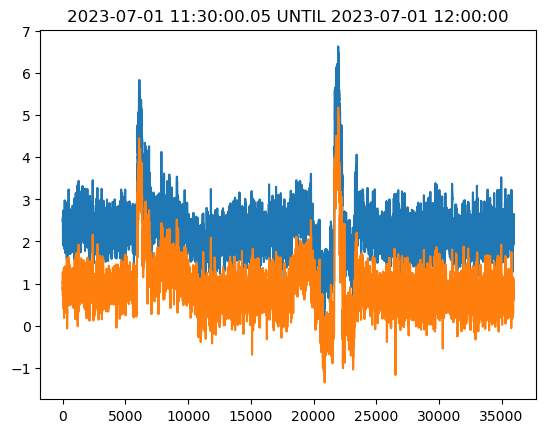

In [5]:
df["Uz1"].plot()
df["Uz2"].plot()
plt.title(df.TIMESTAMP[0] + ' UNTIL ' + df.TIMESTAMP[ len(df.TIMESTAMP)-1 ])

# Interesting different offsets, but a slight attack angle can cause that, boring
# Also let's cut off the last 2 points which are zeros

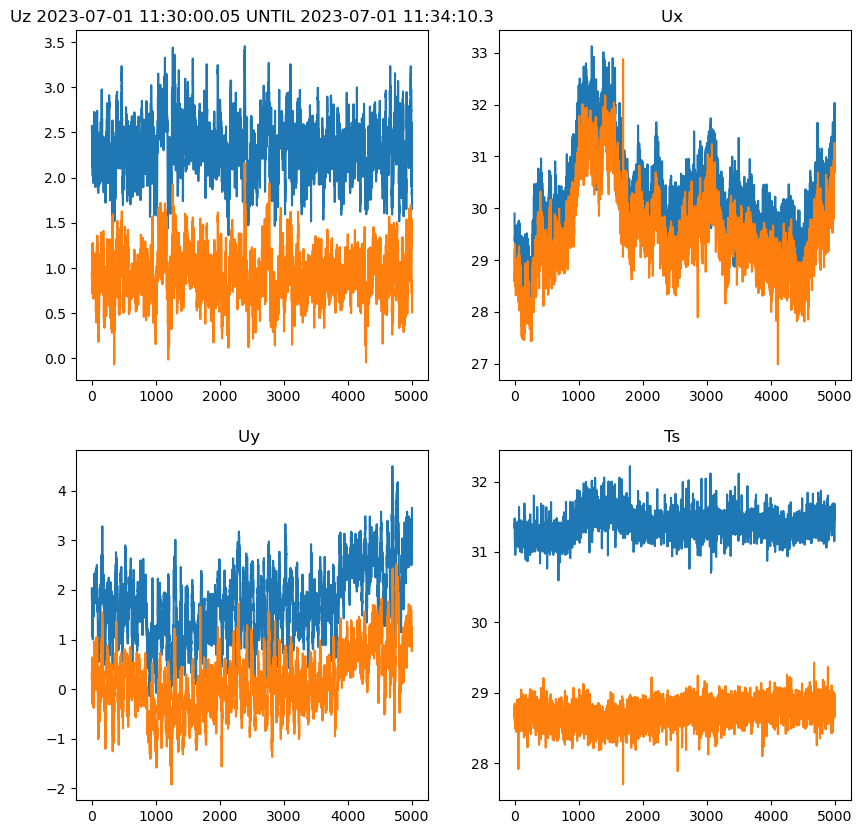

In [6]:
# Just take the first 5000 times 
df = df[0:5000]

plt.figure( figsize=(10,10) )

plt.subplot(221)
df["Uz1"].plot()
df["Uz2"].plot()
plt.title('Uz ' + df.TIMESTAMP[0] + ' UNTIL ' + df.TIMESTAMP[ len(df.TIMESTAMP)-1 ]);

plt.subplot(222)
df["Ux1"].plot()
df["Ux2"].plot()
plt.title('Ux ');

plt.subplot(223)
df["Uy1"].plot()
df["Uy2"].plot()
plt.title('Uy ');

plt.subplot(224)
df["Ts1"].plot()
df["Ts2"].plot()
plt.title('Ts ');

# Remove means and look at Uz1', Uz2' 

In [11]:
# Perturbations of u,v,w,T

df["Uz1'"] = df['Uz1']-df['Uz1'].mean()
df["Uz2'"] = df['Uz2']-df['Uz2'].mean()
df["Ux1'"] = df['Ux1']-df['Ux1'].mean()
df["Ux2'"] = df['Ux2']-df['Ux2'].mean()
df["Uy1'"] = df['Uy1']-df['Uy1'].mean()
df["Uy2'"] = df['Uy2']-df['Uy2'].mean()
df["Ts1'"] = df['Ts1']-df['Ts1'].mean()
df["Ts2'"] = df['Ts2']-df['Ts2'].mean()

/var/folders/8f/r03vpksx46l5r53nhvpfywtc0000gn/T/ipykernel_74353/1162625869.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Uz1'"] = df['Uz1']-df['Uz1'].mean()
/var/folders/8f/r03vpksx46l5r53nhvpfywtc0000gn/T/ipykernel_74353/1162625869.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Uz2'"] = df['Uz2']-df['Uz2'].mean()
/var/folders/8f/r03vpksx46l5r53nhvpfywtc0000gn/T/ipykernel_74353/1162625869.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

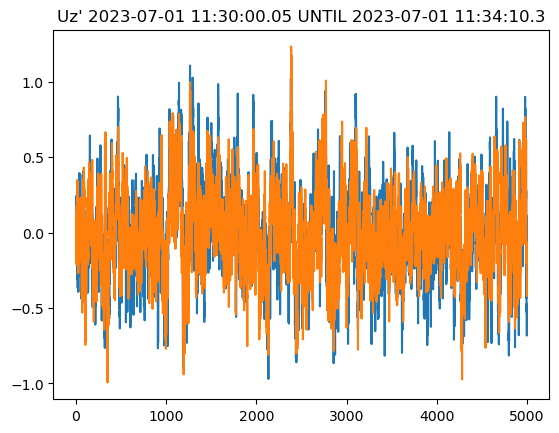

In [16]:
# Plot perturbation Uz' 

df["Uz1'"].plot();
df["Uz2'"].plot();
plt.title("Uz' " + df.TIMESTAMP[0] + ' UNTIL ' + df.TIMESTAMP[ len(df.TIMESTAMP)-1 ]);

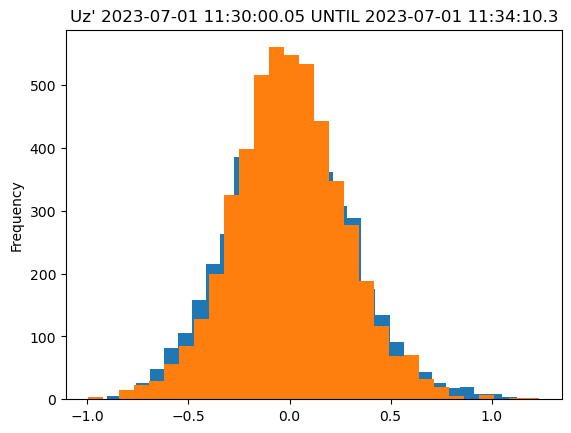

In [13]:
df["Uz1'"].plot.hist(bins=30)
df["Uz2'"].plot.hist(bins=30);
plt.title("Uz' " + df.TIMESTAMP[0] + ' UNTIL ' + df.TIMESTAMP[ len(df.TIMESTAMP)-1 ]);

# Uz1 with its bigger offset also has bigger range

# How about at 1Hz? rolling(20) mean? 
### Result: still Uz1' has more variance, but at 2Hz they are equal

Text(0.5, 1.0, "Histograms of 1 Hz w' from channels 1 and 2")

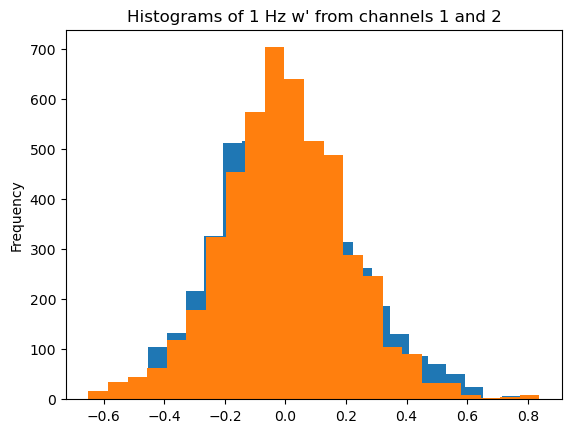

In [135]:
df["Uz1'"].rolling(20).mean().plot.hist(bins=23)
df["Uz2'"].rolling(20).mean().plot.hist(bins=23)
plt.title("Histograms of 1 Hz w' from channels 1 and 2")

# Not much less than the 20Hz range, indicating most of the variance is sub- 1Hz 

# Weird that 1s and 2s averages are so different ?!
## Decompose data by scale (frquency)

In [17]:
# FFT, rescale by number of values so the variance is correct 

import numpy as np 

freq = range(df.Uz1.size//2)
spec_w1 = np.fft.fft( df["Uz1'"] )[0:df.Uz1.size//2] /np.size(spec_w1)
spec_w2 = np.fft.fft( df["Uz2'"] )[0:df.Uz1.size//2] /np.size(spec_w1)
spec_u1 = np.fft.fft( df["Ux1'"] )[0:df.Uz1.size//2] /np.size(spec_w1)
spec_u2 = np.fft.fft( df["Ux2'"] )[0:df.Uz1.size//2] /np.size(spec_w1)
spec_v1 = np.fft.fft( df["Uy1'"] )[0:df.Uz1.size//2] /np.size(spec_w1)
spec_v2 = np.fft.fft( df["Uy2'"] )[0:df.Uz1.size//2] /np.size(spec_w1)
spec_T1 = np.fft.fft( df["Ts1'"] )[0:df.Uz1.size//2] /np.size(spec_w1)
spec_T2 = np.fft.fft( df["Ts2'"] )[0:df.Uz1.size//2] /np.size(spec_w1)

meanwspec = (spec_w1+spec_w2)/2
meanTspec = (spec_T1+spec_T2)/2
meanuspec = (spec_u1+spec_u2)/2
meanvspec = (spec_v1+spec_v2)/2

In [1]:
# Confirm total variance (should be same as sum over spectrum, Parseval's theorem
# np.mean( df["Uz1'"]**2 )

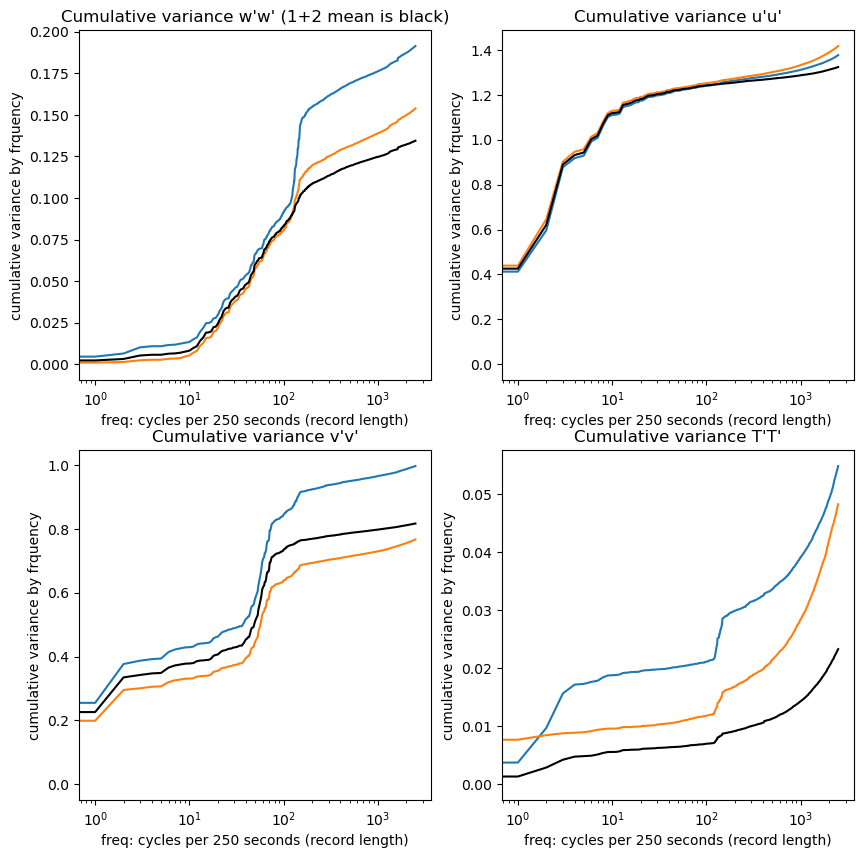

In [47]:
# CUMULATIVE VARIANCE OF EACH VARIABLE 

plt.figure( figsize=(10,10) )

plt.subplot(221)
plt.semilogx(freq, np.cumsum( abs(spec_w1)**2) /np.size(spec_w1)**2)
plt.semilogx(freq, np.cumsum( abs(spec_w2)**2) /np.size(spec_w1)**2)
plt.semilogx(freq, np.cumsum( abs(meanwspec)**2)/np.size(spec_w1)**2, 'black' )

plt.xlabel('freq: cycles per 250 seconds (record length)')
plt.ylabel('cumulative variance by frquency')
plt.title("Cumulative variance w'w' (1+2 mean is black)") 

plt.subplot(222)
plt.semilogx(freq, np.cumsum( abs(spec_u1)**2)/np.size(spec_w1)**2 )
plt.semilogx(freq, np.cumsum( abs(spec_u2)**2)/np.size(spec_w1)**2 )
plt.semilogx(freq, np.cumsum( abs(meanuspec)**2)/np.size(spec_w1)**2, 'black' )

plt.xlabel('freq: cycles per 250 seconds (record length)')
plt.ylabel('cumulative variance by frquency')
plt.title("Cumulative variance u'u'") 

plt.subplot(223)
plt.semilogx(freq, np.cumsum( abs(spec_v1)**2)/np.size(spec_w1)**2 )
plt.semilogx(freq, np.cumsum( abs(spec_v2)**2)/np.size(spec_w1)**2 )
plt.semilogx(freq, np.cumsum( abs(meanvspec)**2)/np.size(spec_w1)**2, 'black' )

plt.xlabel('freq: cycles per 250 seconds (record length)')
plt.ylabel('cumulative variance by frquency')
plt.title("Cumulative variance v'v'") 


plt.subplot(224)
plt.semilogx(freq, np.cumsum( abs(spec_T1)**2)/np.size(spec_w1)**2 )
plt.semilogx(freq, np.cumsum( abs(spec_T2)**2)/np.size(spec_w1)**2 )
plt.semilogx(freq, np.cumsum( abs(meanTspec)**2/np.size(spec_w1)**2), 'black' )

plt.xlabel('freq: cycles per 250 seconds (record length)')
plt.ylabel('cumulative variance by frquency')
plt.title("Cumulative variance T'T'");

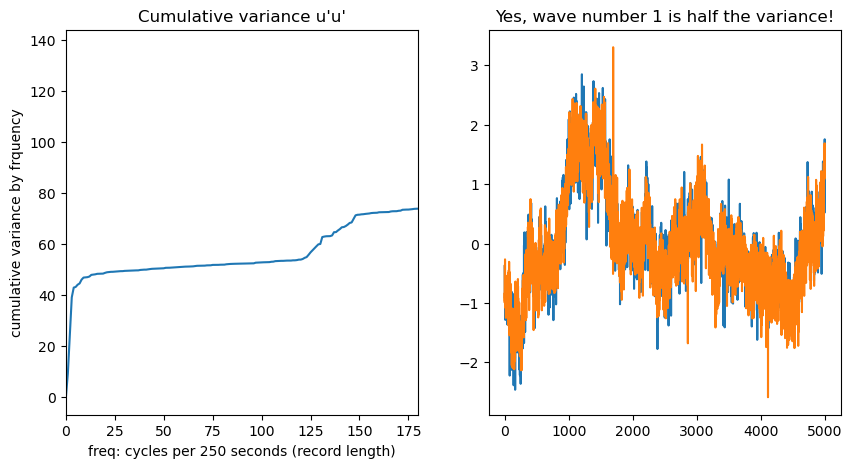

In [48]:
# Why so much u'u' in wave number 1? 

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(freq, np.cumsum( abs(spec_T1)**2)/np.size(spec_w1))
plt.xlabel('freq: cycles per 250 seconds (record length)')
plt.ylabel('cumulative variance by frquency')
plt.title("Cumulative variance u'u'") 

plt.xlim([0,180])
plt.subplot(122)
df["Ux1'"].plot();
df["Ux2'"].plot();
plt.title("Yes, wave number 1 is half the variance!");

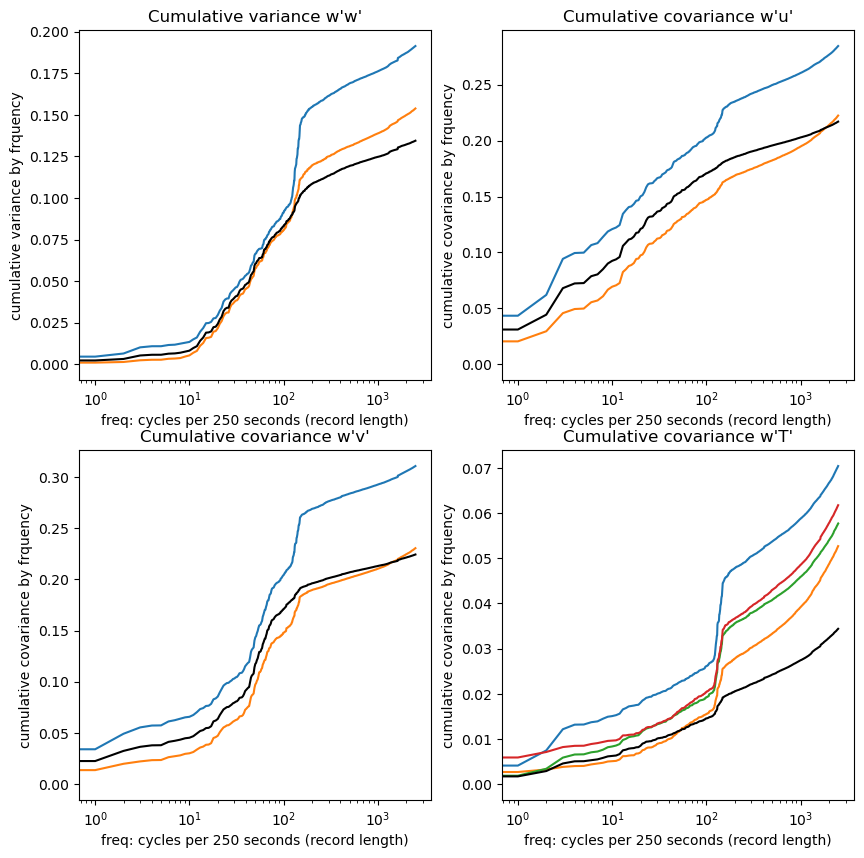

In [49]:
# CUMULATIVE COVARIANCE (FLUXES) 

plt.figure( figsize=(10,10) )

plt.subplot(221)
plt.semilogx(freq, np.cumsum( abs(spec_w1)**2)/np.size(spec_w1)**2 )
plt.semilogx(freq, np.cumsum( abs(spec_w2)**2)/np.size(spec_w1)**2 )
# mean Uz', mean T', maybe trusted more 
plt.semilogx(freq, np.cumsum( abs(meanwspec*meanwspec))/np.size(spec_w1)**2 ,'black' )

plt.xlabel('freq: cycles per 250 seconds (record length)')
plt.ylabel('cumulative variance by frquency')
plt.title("Cumulative variance w'w'") 

plt.subplot(222)
plt.semilogx(freq, np.cumsum(abs (spec_w1*spec_u1))/np.size(spec_w1)**2 )
plt.semilogx(freq, np.cumsum(abs (spec_w2*spec_u2))/np.size(spec_w1)**2 )
# mean Uz', mean T', maybe trusted more 
plt.semilogx(freq, np.cumsum( abs(meanwspec*meanuspec))/np.size(spec_w1)**2 ,'black' )

plt.xlabel('freq: cycles per 250 seconds (record length)')
plt.ylabel('cumulative covariance by frquency')
plt.title("Cumulative covariance w'u'") 

plt.subplot(223)
plt.semilogx(freq, np.cumsum(abs (spec_w1*spec_v1))/np.size(spec_w1)**2 )
plt.semilogx(freq, np.cumsum(abs (spec_w2*spec_v2))/np.size(spec_w1)**2 )
# mean Uz', mean T', maybe trusted more 
plt.semilogx(freq, np.cumsum( abs(meanwspec*meanvspec))/np.size(spec_w1)**2 ,'black' )

plt.xlabel('freq: cycles per 250 seconds (record length)')
plt.ylabel('cumulative covariance by frquency')
plt.title("Cumulative covariance w'v'") 


plt.subplot(224)
plt.semilogx(freq, np.cumsum(abs (spec_w1*spec_T1))/np.size(spec_w1)**2 )
plt.semilogx(freq, np.cumsum(abs (spec_w2*spec_T2))/np.size(spec_w1)**2 )
# cross instrument, since they are different sensors
plt.semilogx(freq, np.cumsum(abs (spec_w2*spec_T1))/np.size(spec_w1)**2 )
plt.semilogx(freq, np.cumsum(abs (spec_w1*spec_T2))/np.size(spec_w1)**2 )

# mean Uz', mean T', maybe trusted more 
plt.semilogx(freq, np.cumsum( abs(meanwspec*meanTspec))/np.size(spec_w1)**2 ,'black' )

plt.xlabel('freq: cycles per 250 seconds (record length)')
plt.ylabel('cumulative covariance by frquency')
plt.title("Cumulative covariance w'T'");


# Lagged correlations

In [263]:
# Define lag correlation function
def crosscorr(datax, datay, nlags=10):
    lags=[]
    vals=[]
    # Fill the values array
    for lag in range(-nlags,nlags,1):
        xcor = datax.corr(datay.shift(lag))
        lags.append( lag ) 
        vals.append( xcor ) 
    return(lags,vals)

In [264]:
import warnings
warnings.filterwarnings('ignore')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Text(0.5, 0, 'time steps @ 20Hz')

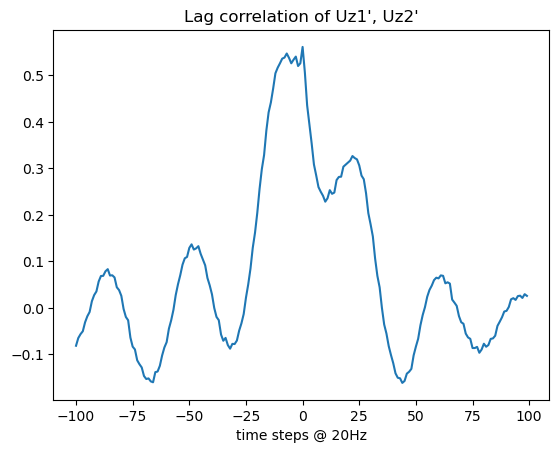

In [265]:
lags,vals = crosscorr(df["Uz1'"], df["Uz2'"], 100)
plt.plot(lags,vals)
plt.title("Lag correlation of Uz1', Uz2'")
plt.xlabel("time steps @ 20Hz")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Text(0.5, 0, 'Lag (in 1/20 second units)')

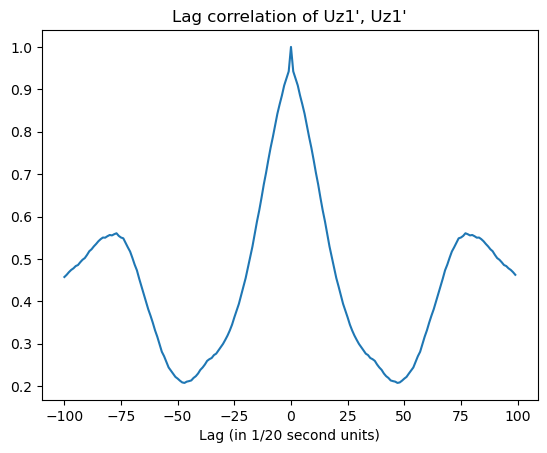

In [273]:
lags,vals = crosscorr(df["Uz1'"], df["Uz1'"], 100)
plt.plot(lags,vals)
plt.title("Lag correlation of Uz1', Uz1'")
plt.xlabel('Lag (1/20 second units)')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Text(0.5, 1.0, "Lag correlation of Uz2', Uz2'")

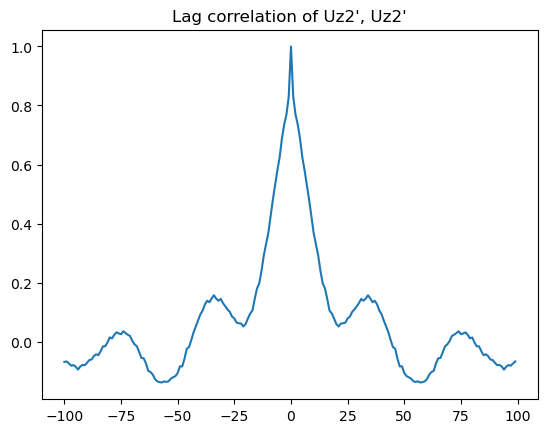

In [267]:
lags,vals = crosscorr(df["Uz2'"], df["Uz2'"], 100)
plt.plot(lags,vals)
plt.title("Lag correlation of Uz2', Uz2'")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Text(0.5, 0, 'Lag (1/20 second units)')

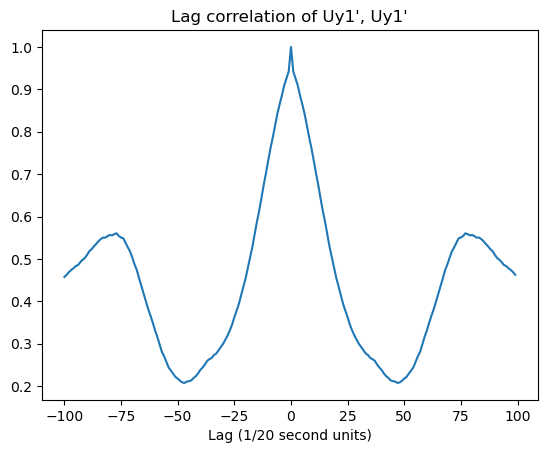

In [274]:
lags,vals = crosscorr(df["Uy1'"], df["Uy1'"], 100)
plt.plot(lags,vals)
plt.title("Lag correlation of Uy1', Uy1'")
plt.xlabel('Lag (1/20 second units)')

# Define mean and difference 

In [268]:
wpmean=(df["Uz1'"]+df["Uz2'"])/2
wpdiff=(df["Uz1"]-df["Uz2"])/2

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Text(0.5, 1.0, "Lag correlation of meanw', meanw'")

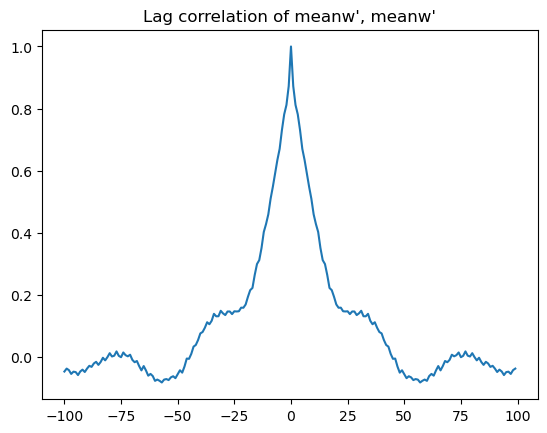

In [269]:
lags,vals = crosscorr(wpmean, wpmean, 100)
plt.plot(lags,vals)
plt.title("Lag correlation of meanw', meanw'")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Text(0.5, 1.0, 'Lag correlation of wpdiff, wpdiff')

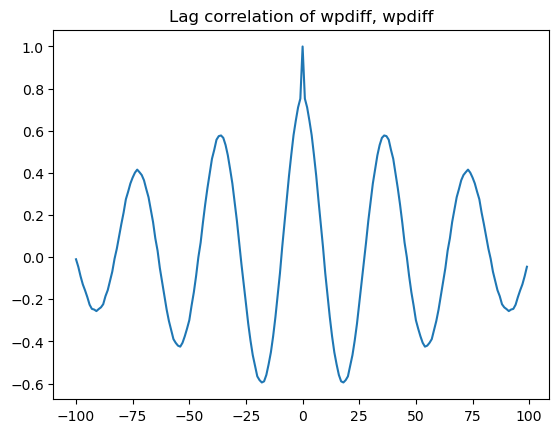

In [270]:
lags,vals = crosscorr(wpdiff, wpdiff, 100)
plt.plot(lags,vals)
plt.title("Lag correlation of wpdiff, wpdiff")

# But okay, let's rush ahead to a flux covariance
## w'T' for example

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Text(0.5, 1.0, "Lag correlation of meanw', meanT'. Value at 0 is flux")

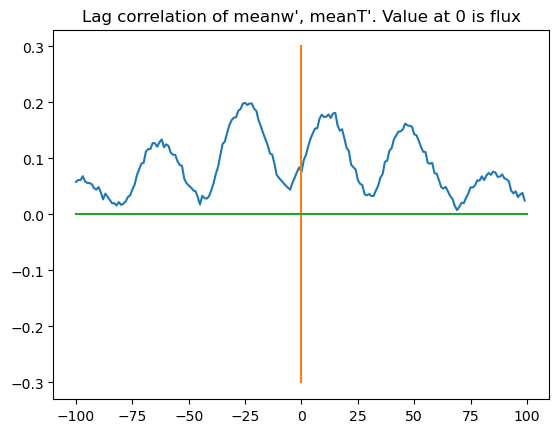

In [271]:
lags,vals = crosscorr(wpmean, (df["Ts1'"]+df["Ts2'"]/2), 100)
plt.plot(lags,vals)
plt.plot([0,0],[-0.3,0.3]); plt.plot([-100,100],[0,0])
plt.title("Lag correlation of meanw', meanT'. Value at 0 is flux")